In [2]:
import gymnasium as gym

# Initialise the environment
env = gym.make("LunarLander-v3", render_mode="human", continuous=True)

# Reset the environment to generate the first observation
observation, info = env.reset(seed=42)
for _ in range(1000):
    # this is where you would insert your policy
    action = env.action_space.sample()

    # step (transition) through the environment with the action
    # receiving the next observation, reward and if the episode has terminated or truncated
    observation, reward, terminated, truncated, info = env.step(action)

    # If the episode has ended then we can reset to start a new episode
    if terminated or truncated:
        observation, info = env.reset()

env.close()

2025-04-15 14:56:38.451 python[84596:2609451] +[IMKClient subclass]: chose IMKClient_Modern
2025-04-15 14:56:38.451 python[84596:2609451] +[IMKInputSession subclass]: chose IMKInputSession_Modern


In [3]:
env.close()

error: XDG_RUNTIME_DIR is invalid or not set in the environment.


episode  0 score -42.59 trailing 100 games avg -42.585
episode  1 score -160.88 trailing 100 games avg -101.730
episode  2 score -334.16 trailing 100 games avg -179.207
episode  3 score -741.38 trailing 100 games avg -319.750
episode  4 score -286.05 trailing 100 games avg -313.010
episode  5 score -591.18 trailing 100 games avg -359.372
episode  6 score -355.46 trailing 100 games avg -358.813
episode  7 score -280.56 trailing 100 games avg -349.032
episode  8 score -229.37 trailing 100 games avg -335.736
episode  9 score -401.19 trailing 100 games avg -342.282
episode  10 score -414.08 trailing 100 games avg -348.809
episode  11 score -303.44 trailing 100 games avg -345.028
episode  12 score -349.53 trailing 100 games avg -345.375
episode  13 score -335.73 trailing 100 games avg -344.686
episode  14 score -445.95 trailing 100 games avg -351.437
episode  15 score -296.79 trailing 100 games avg -348.021
episode  16 score -367.32 trailing 100 games avg -349.157
episode  17 score -572.56 

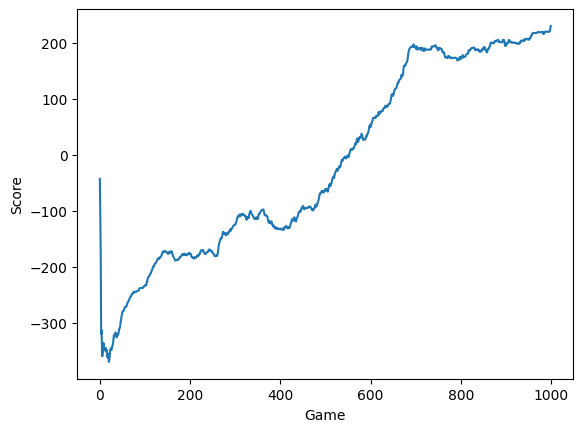

In [1]:
from AIA.rl.lander.plot import plotLearning
from AIA.rl.lander.models import Agent
import numpy as np

import gymnasium as gym

# Initialise the environment
env = gym.make("LunarLander-v3", render_mode="human", continuous=True)

agent = Agent(alpha=0.000025, beta=0.00025, input_dims=[8], tau=0.001, env=env,
              batch_size=64,  layer1_size=400, layer2_size=300, n_actions=2)

#agent.load_models()
np.random.seed(0)

score_history = []
for i in range(1000):
    obs, _ = env.reset()
    done = False
    score = 0
    while not done:
        act = agent.choose_action(obs)
        new_state, reward, done, info, _ = env.step(act)
        agent.remember(obs, act, reward, new_state, int(done))
        agent.learn()
        score += reward
        obs = new_state
        #env.render()
    score_history.append(score)

    #if i % 25 == 0:
    #    agent.save_models()

    print('episode ', i, 'score %.2f' % score,
          'trailing 100 games avg %.3f' % np.mean(score_history[-100:]))

filename = 'LunarLander-alpha000025-beta00025-400-300.png'
plotLearning(score_history, filename, window=100)